In [3]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [35]:
m = leafmap.Map(center=[18.80216364643866, 98.95050931783757], zoom=18, height="500px")
m.add_basemap("SATELLITE")
m

Map(center=[18.80216364643866, 98.95050931783757], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [39]:
bbox = m.user_roi_bounds()
if bbox is None:
    # 98.95556526716221, 18.80424471924795, 98.95188316356634,18.80212646040728
    #  98.95516686434644,18.80411941221213, 98.95178347952785, 18.80209263065302
    bbox = [98.95516686434644,18.80411941221213, 98.95178347952785, 18.80209263065302]

In [40]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/24
Downloaded image 02/24
Downloaded image 03/24
Downloaded image 04/24
Downloaded image 05/24
Downloaded image 06/24
Downloaded image 07/24
Downloaded image 08/24
Downloaded image 09/24
Downloaded image 10/24
Downloaded image 11/24
Downloaded image 12/24
Downloaded image 13/24
Downloaded image 14/24
Downloaded image 15/24
Downloaded image 16/24
Downloaded image 17/24
Downloaded image 18/24
Downloaded image 19/24
Downloaded image 20/24
Downloaded image 21/24
Downloaded image 22/24
Downloaded image 23/24
Downloaded image 24/24
Saving GeoTIFF. Please wait...
Image saved to Image.tif


In [42]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=29985037.0, center=[18.80222153341804, 98.95107278216746], controls=(ZoomControl(options=['position…

In [8]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
text_prompt = "tree"

In [14]:
sam.predict(image, text_prompt, box_threshold=0.34, text_threshold=0.14)

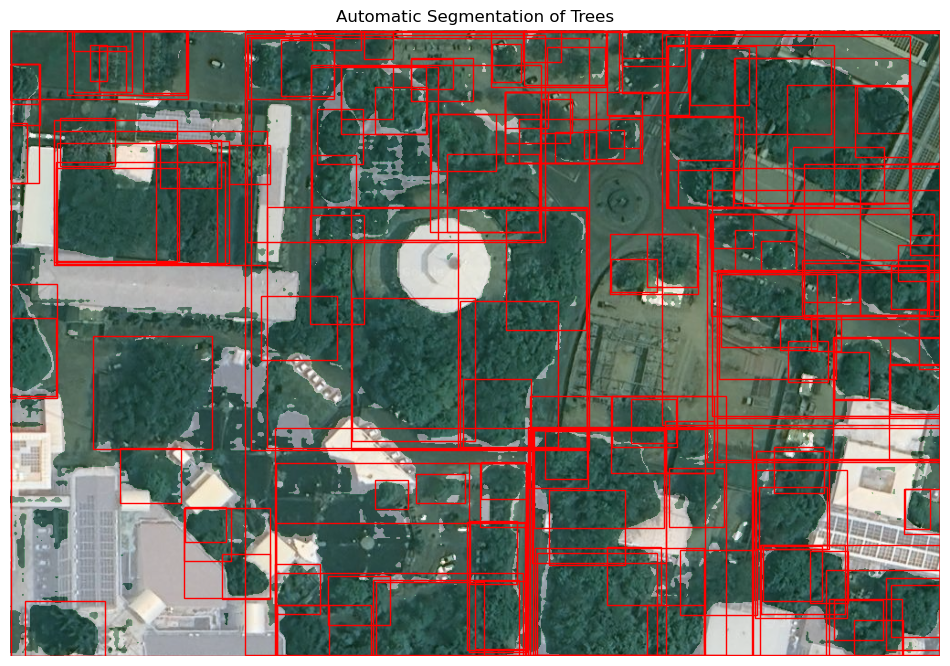

In [11]:
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,
)

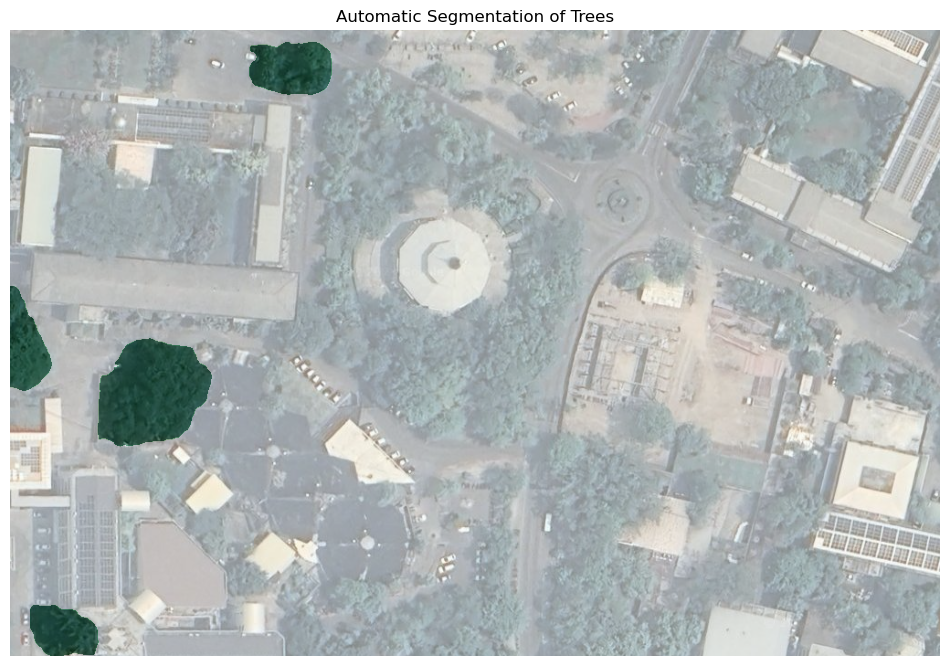

In [19]:
sam.show_anns(
    cmap='Greens',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Trees',
)

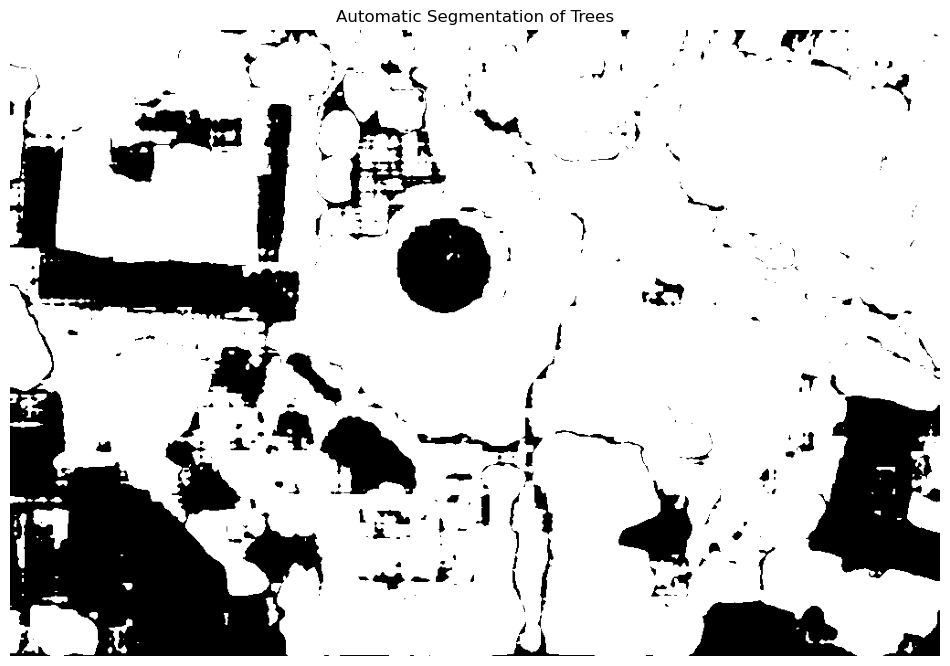

In [13]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Trees',
    blend=False,
    output='trees.tif',
)

In [13]:
sam.raster_to_vector("trees.tif", "trees.shp")

In [14]:
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m

Map(bottom=37796069.0, center=[-22.176382337167194, -51.253991425037384], controls=(ZoomControl(options=['posi…

In [15]:
sam.show_map()

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…